In [1]:
%matplotlib notebook
import gudhi as gd
import matplotlib.pyplot as plt
import numpy as np
from igraph import *
from scipy import sparse
import ripser

In [2]:
def getLowerStarTimeSeriesD(x):
    N = x.size
    # Add edges between adjacent points in the time series, with the "distance" 
    # along the edge equal to the max value of the points it connects
    I = np.arange(N-1)
    J = np.arange(1, N)
    V = np.maximum(x[0:-1], x[1::])
    # Add vertex birth times along the diagonal of the distance matrix
    I = np.concatenate((I, np.arange(N)))
    J = np.concatenate((J, np.arange(N)))
    V = np.concatenate((V, x))
    #Create the sparse distance matrix
    D = sparse.coo_matrix((V, (I, J)), shape=(N, N)).tocsr()
    return D

In [8]:
np.random.seed(0)
NSamples = 260
t = np.linspace(0, 50, NSamples)
x = 10*(np.cos(0.2*np.pi*t) + 0.1*t)
n_iter = 100

Dx = getLowerStarTimeSeriesD(x)
Ix1 = ripser.ripser(Dx, distance_matrix=True, maxdim=0)['dgms'][0]
Ix1 = Ix1[np.isfinite(Ix1[:, 1]), :]

r_vals1 = [None] * n_iter

for i in range(0,n_iter):
    y = x + 2*np.random.randn(NSamples)
    Dy = getLowerStarTimeSeriesD(y)
    Iy1 = ripser.ripser(Dy, distance_matrix=True, maxdim=0)['dgms'][0]
    Iy1 = Iy1[np.isfinite(Iy1[:, 1]), :]
    n_points1=len(Ix1)+len(Iy1)
    #compute the D_{X,Y} values
    d_vals1 = np.linspace(0,n_points1,n_points1+1)
    r_vals1[i] = [gd.prokhorov_distance(Ix1, Iy1, np.array([r])) for r in d_vals1]



np.random.seed(0)
NSamples = 250
t = np.linspace(0, 50, NSamples)
x = 10*(np.cos(0.1*np.pi*t) + 0.1*t)

Dx = getLowerStarTimeSeriesD(x)
Ix2 = ripser.ripser(Dx, distance_matrix=True, maxdim=0)['dgms'][0]
Ix2 = Ix2[np.isfinite(Ix2[:, 1]), :]

r_vals2 = [None] * n_iter

for i in range(0,n_iter):
    y = x + 2*np.random.randn(NSamples)
    Dy = getLowerStarTimeSeriesD(y)
    Iy2 = ripser.ripser(Dy, distance_matrix=True, maxdim=0)['dgms'][0]
    Iy2 = Iy2[np.isfinite(Iy2[:, 1]), :]
    n_points2=len(Ix2)+len(Iy2)
    #compute the D_{X,Y} values
    d_vals2 = np.linspace(0,n_points2,n_points2+1)
    r_vals2[i] = [gd.prokhorov_distance(Ix2, Iy2, np.array([r])) for r in d_vals2]

<IPython.core.display.Javascript object>


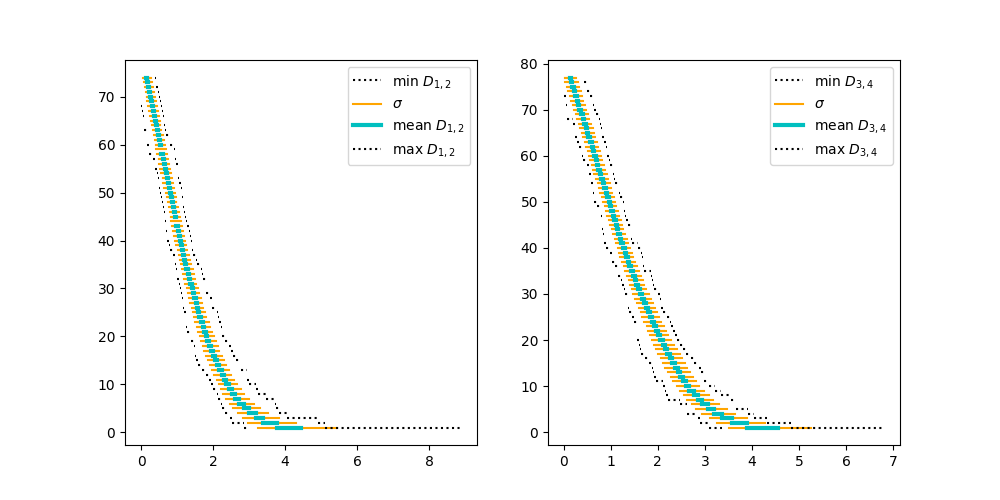

In [9]:
l1 = min([len(ar) for ar in r_vals1])
r_mean1 = [np.mean([r_vals1[i][j] for i in range(0,len(r_vals1))]) for j in range(0,l1)]
r_max1 = [np.max([r_vals1[i][j] for i in range(0,len(r_vals1))]) for j in range(0,l1)]
r_min1 = [np.min([r_vals1[i][j] for i in range(0,len(r_vals1))]) for j in range(0,l1)]
r_std1 = [np.std([r_vals1[i][j] for i in range(0,len(r_vals1))]) for j in range(0,l1)]

l2 = min([len(ar) for ar in r_vals2])
r_mean2 = [np.mean([r_vals2[i][j] for i in range(0,len(r_vals2))]) for j in range(0,l2)]
r_max2 = [np.max([r_vals2[i][j] for i in range(0,len(r_vals2))]) for j in range(0,l2)]
r_min2 = [np.min([r_vals2[i][j] for i in range(0,len(r_vals2))]) for j in range(0,l2)]
r_std2 = [np.std([r_vals2[i][j] for i in range(0,len(r_vals2))]) for j in range(0,l2)]

fig = plt.figure(figsize = (10,5))
plt.subplot(121)
for i in range(1,l1):
    plt.plot((r_min1[i],r_min1[i-1]),(i, i), c='k', ls = ':', label='min $D_{1,2}$')
    plt.plot((r_mean1[i-1]-r_std1[i-1],r_mean1[i-1]+r_std1[i-1]),(i, i), c='orange', label='$\sigma$')
    plt.plot((r_mean1[i]-r_std1[i],r_mean1[i]+r_std1[i]),(i, i), c='orange', label='$\sigma$')
    plt.plot((r_mean1[i],r_mean1[i-1]),(i, i), c='c', linewidth = 3, label='mean $D_{1,2}$')
    plt.plot((r_max1[i],r_max1[i-1]),(i, i), c='k', ls = ':', label='max $D_{1,2}$')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper right")

plt.subplot(122)
for i in range(1,l2):
    plt.plot((r_min2[i],r_min2[i-1]),(i, i), c='k', ls = ':', label='min $D_{3,4}$')
    plt.plot((r_mean2[i-1]-r_std2[i-1],r_mean2[i-1]+r_std2[i-1]),(i, i), c='orange', label='$\sigma$')
    plt.plot((r_mean2[i]-r_std2[i],r_mean2[i]+r_std2[i]),(i, i), c='orange', label='$\sigma$')
    plt.plot((r_mean2[i],r_mean2[i-1]),(i, i), c='c', linewidth = 3, label='mean $D_{3,4}$')
    plt.plot((r_max2[i],r_max2[i-1]),(i, i), c='k', ls = ':', label='max $D_{3,4}$')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper right")

In [10]:
def D(r_vals, t):
    return np.min(np.where(np.array(r_vals)<=t))

<IPython.core.display.Javascript object>


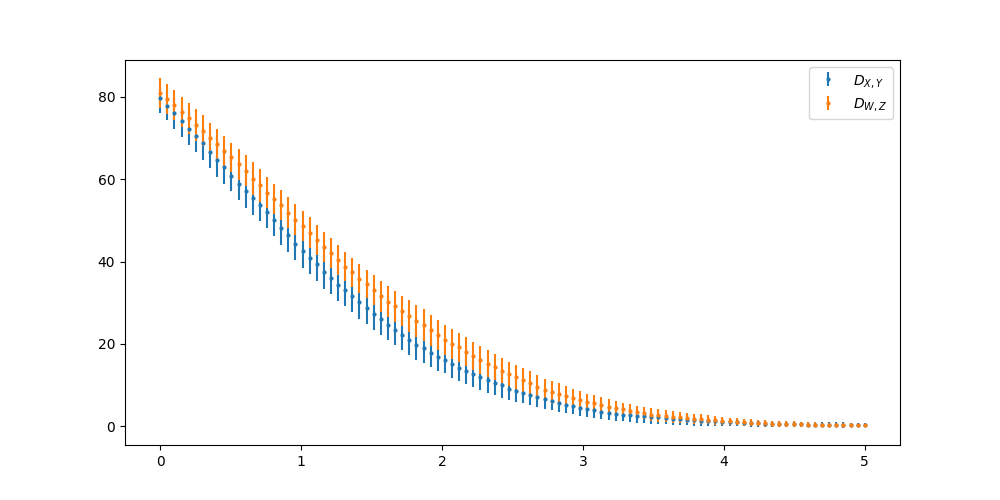

In [13]:
fig = plt.figure(figsize = (10,5))
ts = np.linspace(0,5,100)
Dmean = np.array([np.mean([D(r,t) for r in r_vals1]) for t in ts])
Dstd = np.array([np.std([D(r,t) for r in r_vals1]) for t in ts])
plt.errorbar(ts,Dmean,Dstd, linestyle='None', marker='o', ms = 2, label = "$D_{X,Y}$")

Dmean = np.array([np.mean([D(r,t) for r in r_vals2]) for t in ts])
Dstd = np.array([np.std([D(r,t) for r in r_vals2]) for t in ts])
plt.errorbar(ts,Dmean,Dstd, linestyle='None', marker='o', ms = 2, label = "$D_{W,Z}$")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper right")

plt.show()